<a href="https://colab.research.google.com/github/eabz66/ML_Essentials/blob/main/Team6_MidCourseProject_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# load your chosen dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv')

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
print(len(df))
df.head()

48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Conduct a quality investigation

In [ ]:
# Dropping id, name, host_id, host_name, neighbourhood, last review
df.drop(columns=['id','name','host_id','host_name','neighbourhood','last_review'],inplace=True)

In [ ]:
df.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.duplicated()
df.duplicated().sum()

0

Text(158.22222222222223, 0.5, 'Sample Number')

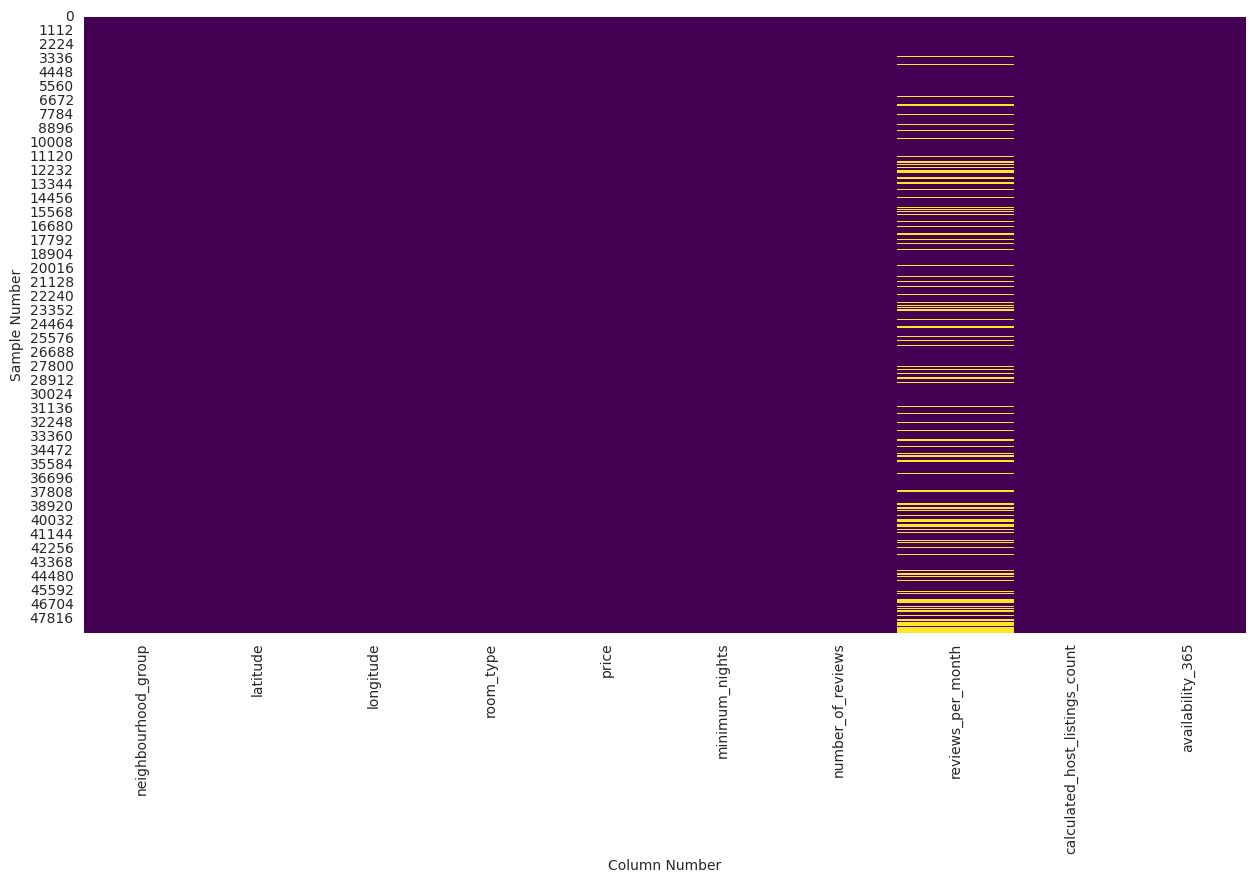

In [ ]:
#Missing Values per Sample (Big Holes)
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
numerics = ['int16','int32','int64','float64']
df[df.select_dtypes(include=numerics).columns] = df.select_dtypes(include=numerics).fillna(0)

In [ ]:
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.describe(include='all')

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,5,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,manhattan,NaN,NaN,entire_home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,21661,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000


# exploratory data analysis (EDA)

## Univariate Analysis

* neighbourhood_group nearly 87% comprises of manhattan and brooklyn
* room_type shared_room is insignificant compared to private_room and entire_home/apt


======================neighbourhood_group===================
Axes(0.125,0.11;0.775x0.77)


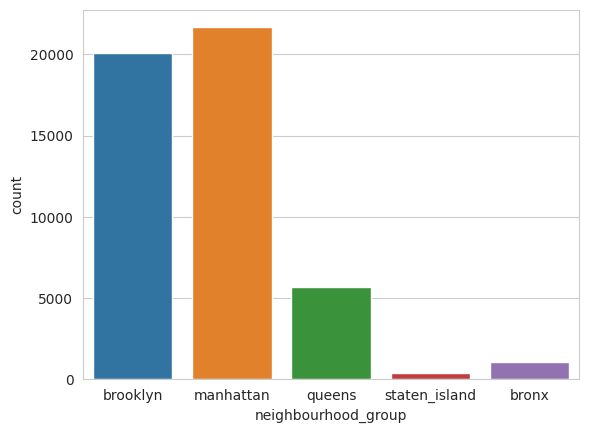

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64


manhattan        0.443011
brooklyn         0.411167
queens           0.115881
bronx            0.022313
staten_island    0.007629
Name: neighbourhood_group, dtype: float64

======================room_type===================
Axes(0.125,0.11;0.775x0.77)


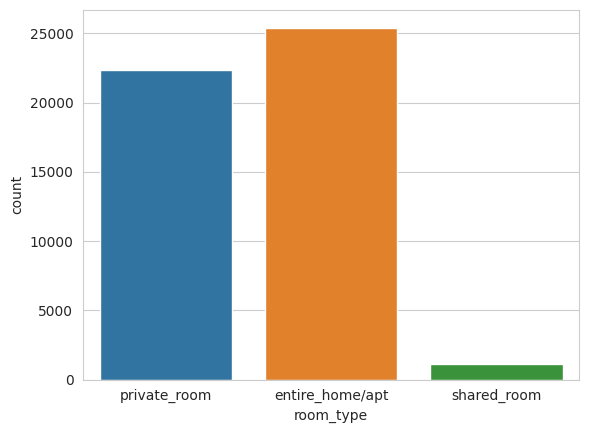

entire_home/apt    25409
private_room       22326
shared_room         1160
Name: room_type, dtype: int64


entire_home/apt    0.519665
private_room       0.456611
shared_room        0.023724
Name: room_type, dtype: float64


In [ ]:
for col in df.select_dtypes(exclude=numerics).columns:
    print('\n======================{}==================='.format(col))
    print(sns.countplot(x = col,data=df))
    plt.show()
    print(df[col].value_counts())
    print('\n')
    print(df[col].value_counts(normalize=True))

## Bivariate analysis
* Price for Manhattan is higher 
* Median Price for other neighbourhood_group is in same range
* Price for room_type entire_home/apt is more 
* Manhattan has room_type entire_home/apt most - causing Price to be higher


In [ ]:
df.select_dtypes(include=numerics).columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

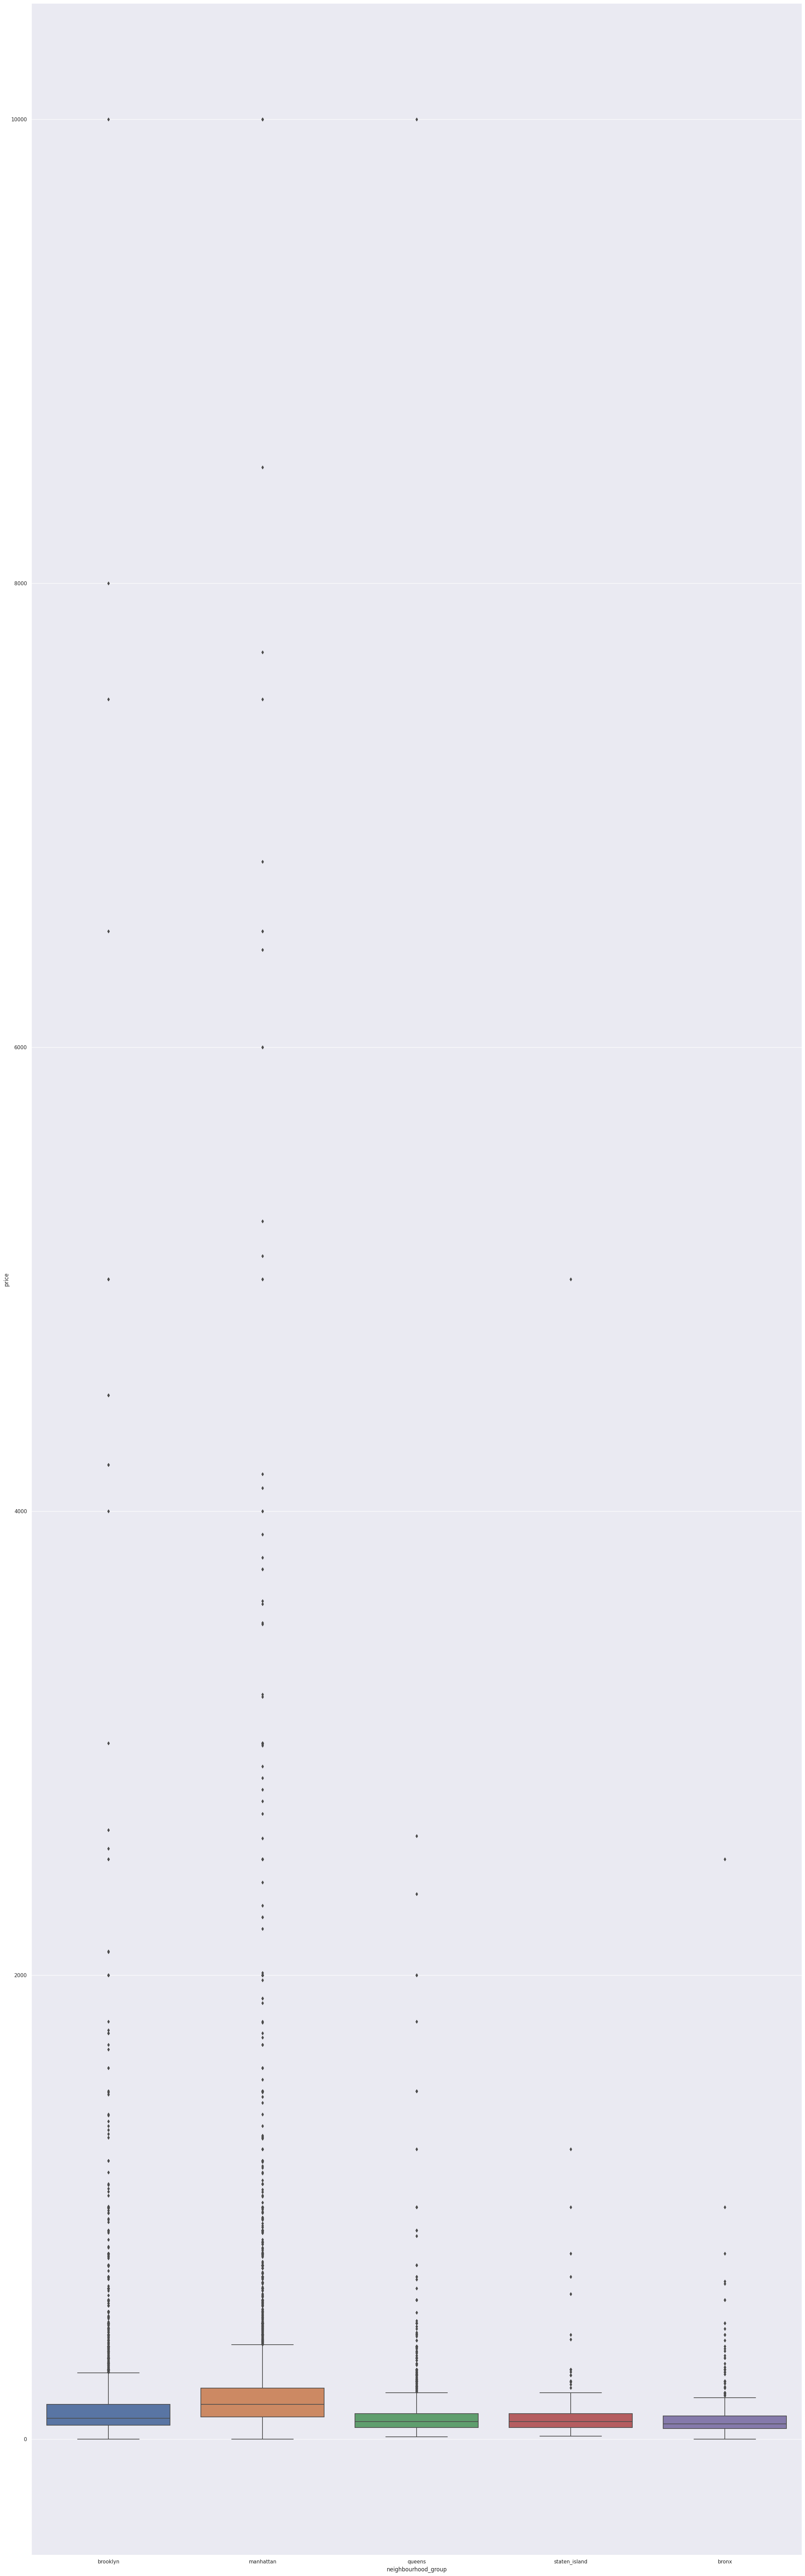

In [ ]:
sns.set(rc={'figure.figsize':(30,100)})
sns.boxplot(x="neighbourhood_group", y="price", data=df);

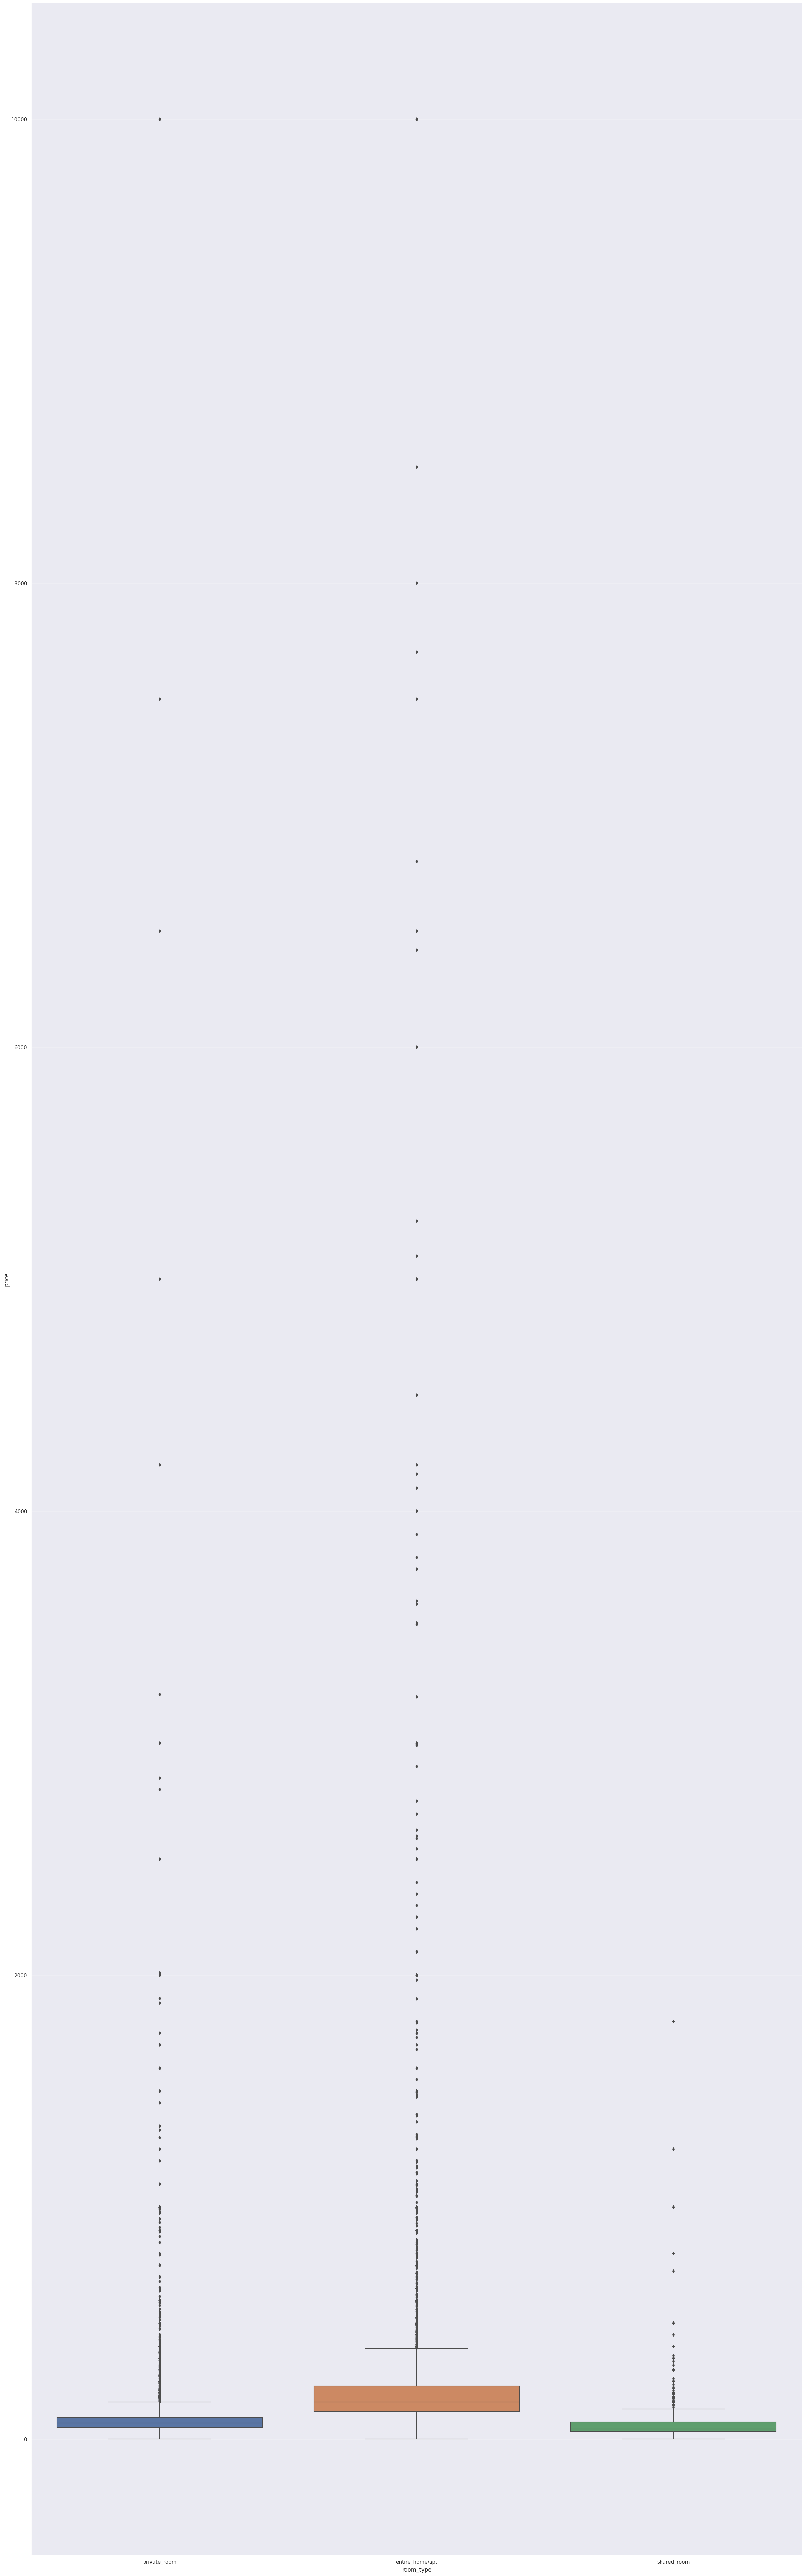

In [ ]:
sns.set(rc={'figure.figsize':(30,100)})
sns.boxplot(x="room_type", y="price", data=df);

In [ ]:
crosstab = pd.crosstab(index=df['neighbourhood_group'], columns=df['room_type'])
print(crosstab)

room_type            entire_home/apt  private_room  shared_room
neighbourhood_group                                            
bronx                            379           652           60
brooklyn                        9559         10132          413
manhattan                      13199          7982          480
queens                          2096          3372          198
staten_island                    176           188            9


In [ ]:
df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [ ]:
sns.set(rc={'figure.figsize':(50,30)})
sns.set_context("talk", font_scale=0.7)

<Axes: >

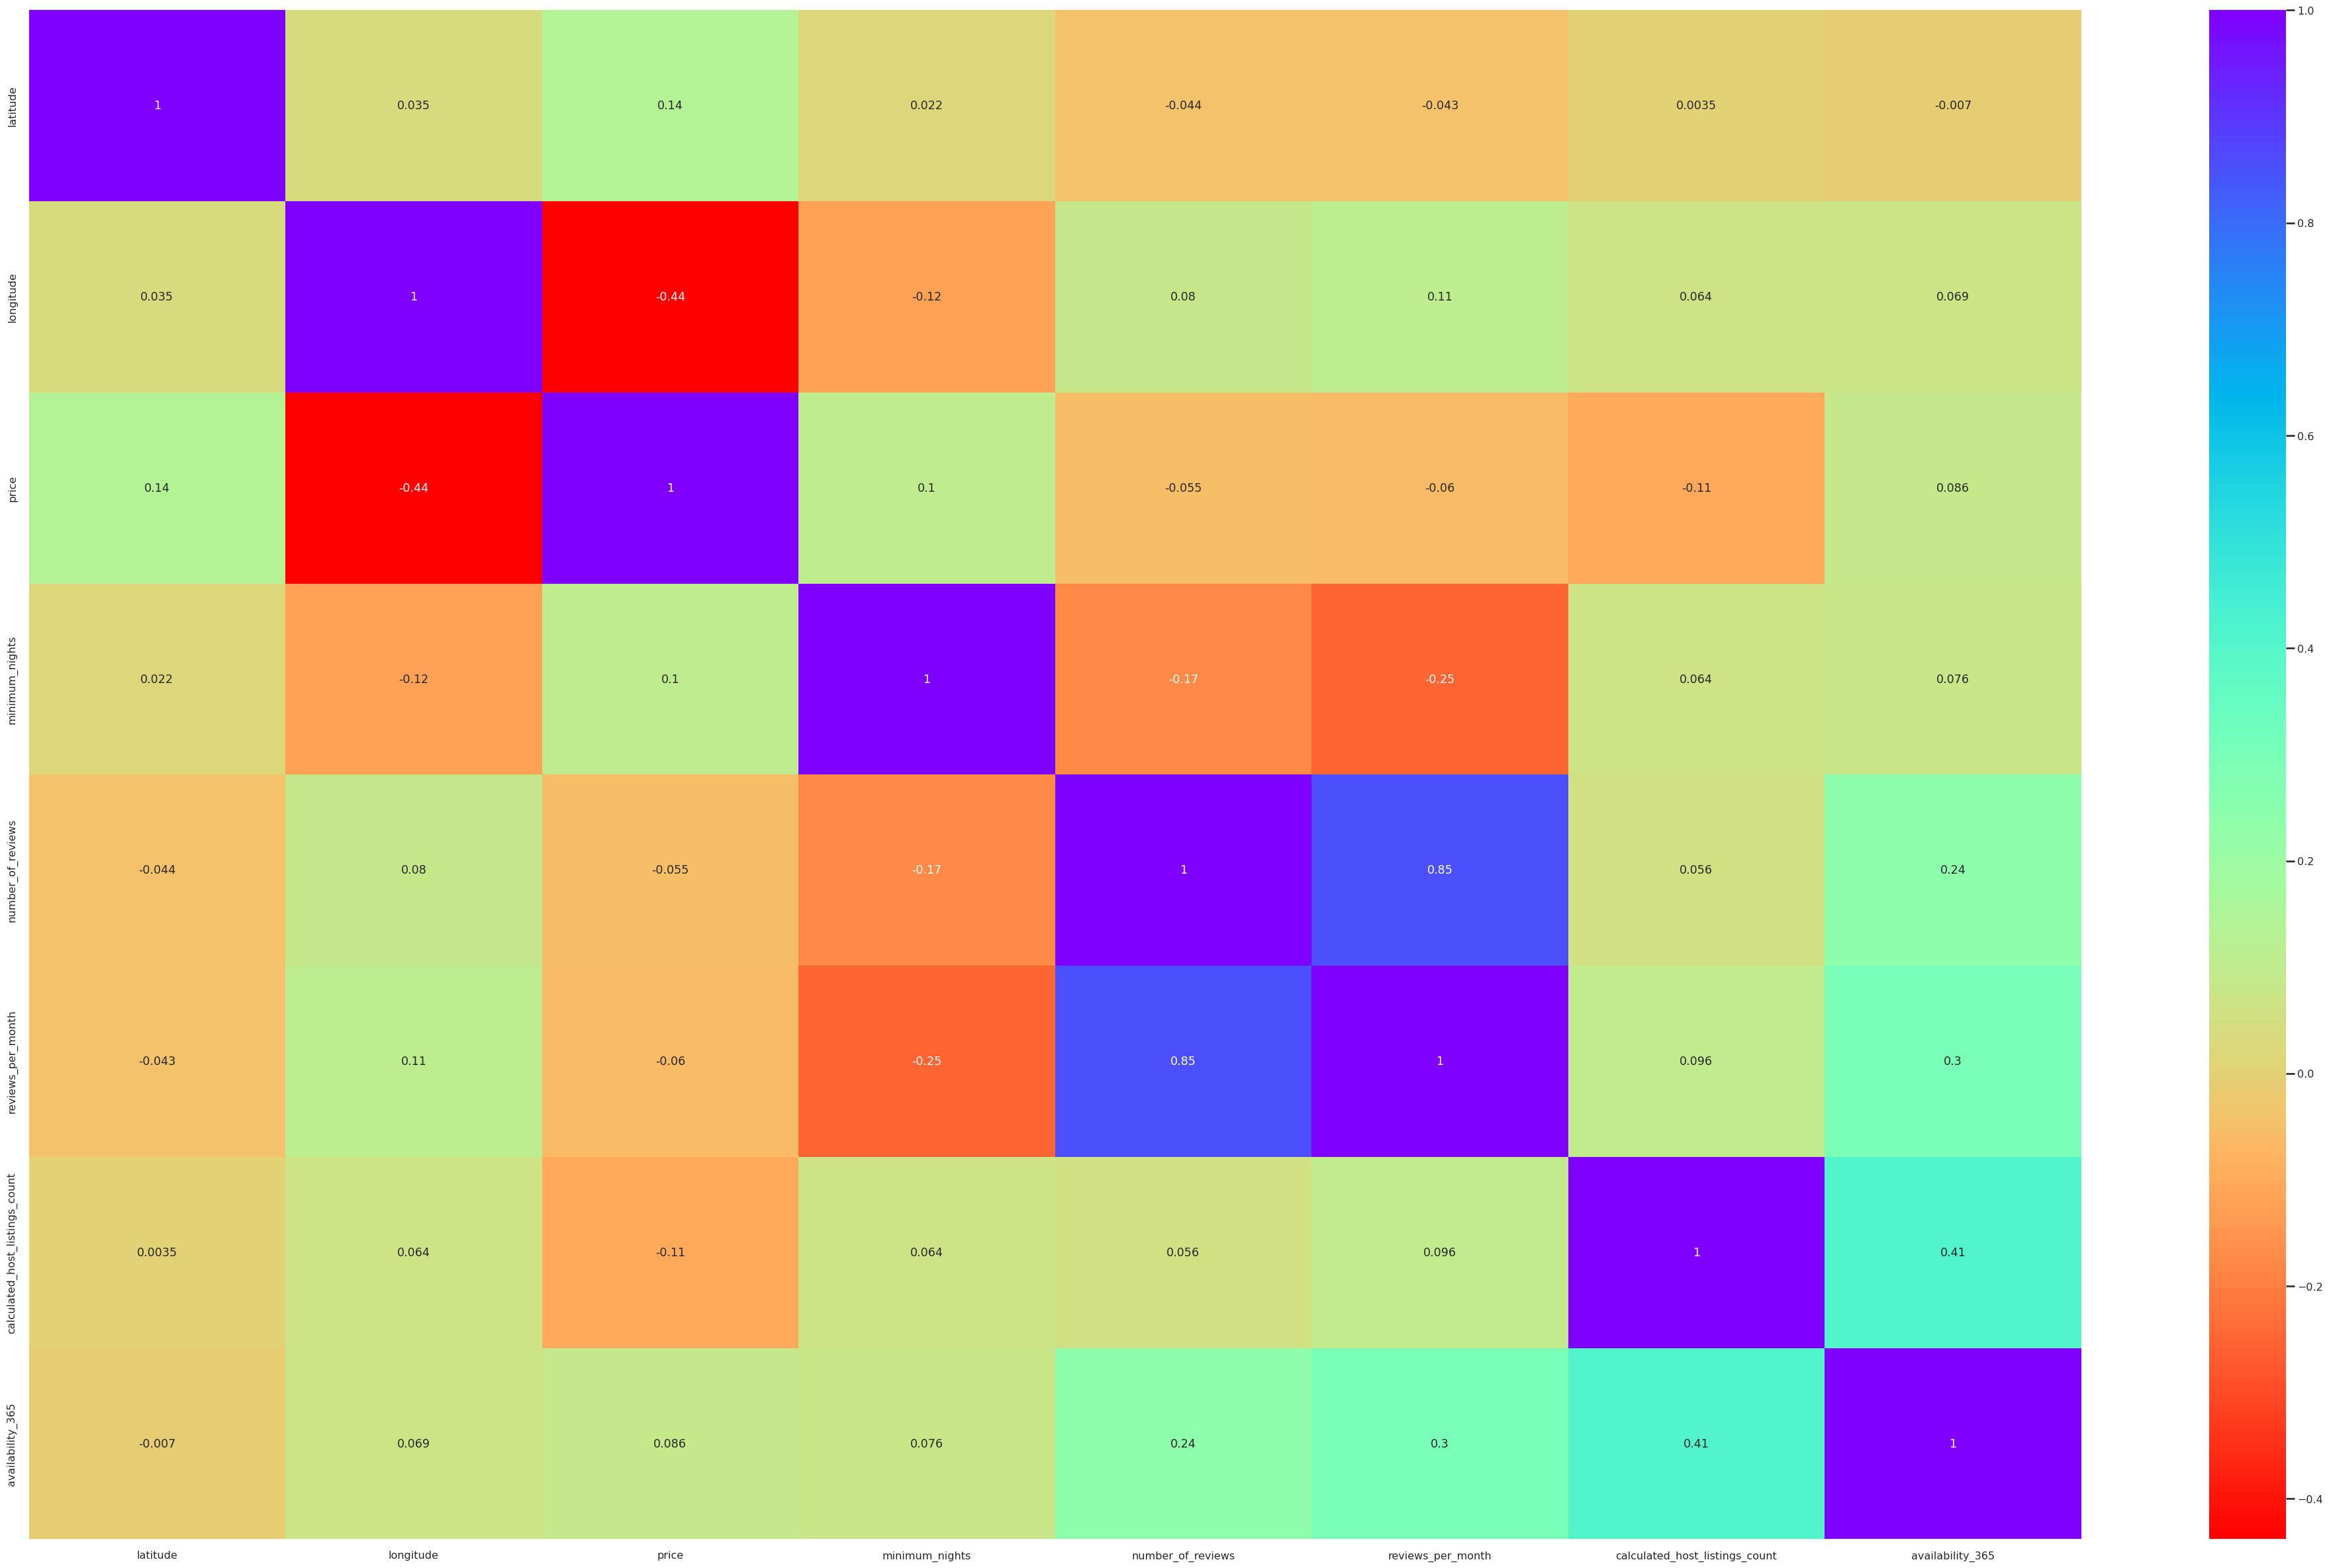

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)
# Longitude and Proce are negatively corelated
# Number of reviews and reviews per month are positively corelated at 0.85 we can remove one column

In [ ]:
#check this why category features are part of this 
df.drop("price", axis=1).apply(lambda x: x.corr(df.price,method='spearman')).sort_values(ascending=False)
# Based on correlation latitude , neighboyhodd_group , minimum nights are postively corelated to Price
# room_type, longitude and calculated_host_listings_count are negatively corelated to Price

latitude                          0.136172
neighbourhood_group               0.124833
minimum_nights                    0.101289
availability_365                  0.086088
number_of_reviews                -0.055009
reviews_per_month                -0.059989
calculated_host_listings_count   -0.106083
longitude                        -0.438035
room_type                        -0.676035
dtype: float64

In [ ]:
#Converting price to binary
df['above_average'] = df['price'] > 152

In [ ]:
df['above_average'].head()

0    False
1     True
2    False
3    False
4    False
Name: above_average, dtype: bool

In [ ]:
df.drop(columns=['price'],inplace=True)

In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,40.64749,-73.97237,private_room,1,9,0.21,6,365,False
1,manhattan,40.75362,-73.98377,entire_home/apt,1,45,0.38,2,355,True
2,manhattan,40.80902,-73.94190,private_room,3,0,0.00,1,365,False
3,brooklyn,40.68514,-73.95976,entire_home/apt,1,270,4.64,1,194,False
4,manhattan,40.79851,-73.94399,entire_home/apt,10,9,0.10,1,0,False


# Feature Selection

In [ ]:
df.above_average = (df.above_average == True).astype(int)

In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,40.64749,-73.97237,private_room,1,9,0.21,6,365,0
1,manhattan,40.75362,-73.98377,entire_home/apt,1,45,0.38,2,355,1
2,manhattan,40.80902,-73.94190,private_room,3,0,0.00,1,365,0
3,brooklyn,40.68514,-73.95976,entire_home/apt,1,270,4.64,1,194,0
4,manhattan,40.79851,-73.94399,entire_home/apt,10,9,0.10,1,0,0


In [ ]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

class FeatureSelector():
    """
    Class for performing feature selection for machine learning or data preprocessing.
    
    Implements five different methods
    
        1. Remove columns with a missing percentage greater than a specified threshold
        2. Remove columns with a single unique value
        3. Remove collinear variables with a correlation greater than a specified correlation coefficient
        4. Remove features with 0.0 feature importance from a gradient boosting machine (gbm)
        5. Remove features that do not contribute to a specified cumulative feature importance from the gbm
        
    Attributes
    --------
    
    record_missing : dataframe
        Records the fraction of missing values for features with missing fraction above threshold
    
    record_single_unique : dataframe
        Records the features that have a single unique value
    
    record_collinear : dataframe
        Records the pairs of collinear variables with a correlation coefficient above the threshold
    
    record_zero_importance : dataframe
        Records the zero importance features in the data according to the gbm
    
    record_low_importance : dataframe
        Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm
    
    feature_importances : dataframe
        All the features importances from the gbm
    
    removal_ops : dict
        Dictionary of removal operations and associated features for removal identified
        
    Notes
    --------
    
        - All 5 operations can be run with the `identify_all` method.
        - Calculating the feature importances requires labels (a supervised learning task) 
          for training the gradient boosting machine
        - For the feature importances, the dataframe is first one-hot encoded before training the gbm.
    
    """
    
    def __init__(self):
        
        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None
        
        self.feature_importances = None
        
        # Dictionary to hold removal operations
        self.removal_ops = {}
        
        
        
    def identify_missing(self, data, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""
        
        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column 
        missing_series = data.isnull().sum() / data.shape[0]
        
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.removal_ops['missing'] = to_drop
        
        print('%d features with greater than %0.2f missing values.\n' % (len(self.removal_ops['missing']), self.missing_threshold))
        
    def identify_single_unique(self, data):
        """Identifies features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = data.nunique()

        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        
        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})

        to_drop = list(record_single_unique['feature'])
    
        self.record_single_unique = record_single_unique
        self.removal_ops['single_unique'] = to_drop
        
        print('%d features with a single unique value.\n' % len(self.removal_ops['single_unique']))
    
    def identify_collinear(self, data, correlation_threshold):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 

        Using code adapted from: https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c
        
        Parameters
        --------

        data : dataframe
            Data observations in the rows and features in the columns

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        """
        
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

            
        self.record_collinear = record_collinear
        self.removal_ops['collinear'] = to_drop
        
        print('%d features with a correlation greater than %0.2f.\n' % (len(self.removal_ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, features, labels, eval_metric, task='classification', 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting. 
        The feature importances are averaged over n_iterations to reduce variance. 
        
        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters 
        --------
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine

        task : string, default = 'classification'
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine
            
        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training
        
        
        Notes
        --------
        
        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        # One hot encoding
        features = pd.get_dummies(features)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))
        
        print('Training Gradient Boosting Model\n')
        
        # Iterate through each fold
        for _ in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            else:
                raise ValueError('Task must be either "classification" or "regression"')
                
            # If training using early stopping need a validation set
            if early_stopping:
                
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)

                # Train the model with early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)
                
                # Clean up memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
                
            else:
                model.fit(features, labels)

            # Record the feature importances
            feature_importance_values += model.feature_importances_ / n_iterations

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

        # Extract the features with zero importance
        record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        
        to_drop = list(record_zero_importance['feature'])

        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.removal_ops['zero_importance'] = to_drop
        
        print('\n%d features with zero importance.\n' % len(self.removal_ops['zero_importance']))
    
    def identify_low_importance(self, cumulative_importance):
        """
        Finds the lowest importance features not needed to account for `cumulative_importance` 
        of the feature importance from the gradient boosting machine. As an example, if cumulative
        importance is set to 0.95, this will retain only the most important features needed to 
        reach 95% of the total feature importance. The identified features are those not needed.

        Parameters
        --------
        cumulative_importance : float between 0 and 1
            The fraction of cumulative importance to account for 

        """

        self.cumulative_importance = cumulative_importance
        
        # The feature importances need to be calculated before running
        if self.feature_importances is None:
            raise NotFittedError('Feature importances have not yet been determined. Call the `identify_zero_importance` method` first.')
            
        # Make sure most important features are on top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

        # Identify the features not needed to reach the cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

        to_drop = list(record_low_importance['feature'])

        self.record_low_importance = record_low_importance
        self.removal_ops['low_importance'] = to_drop
    
        print('%d features that do not contribute to cumulative importance of %0.2f.\n' % (len(self.removal_ops['low_importance']), self.cumulative_importance))
        
    def identify_all(self, features, labels, selection_params):
        """
        Use all five of the methods to identify features to remove.
        
        Parameters
        --------
        
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')
            
        selection_params : dict
           Parameters to use in the five feature selection methhods.
           Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
        """
        
        # Check for all required parameters
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s is a required parameter for this method' % param)
        
        # Implement each of the five methods
        self.identify_missing(features, selection_params['missing_threshold'])
        self.identify_single_unique(features)
        self.identify_collinear(features, selection_params['correlation_threshold'])
        self.identify_zero_importance(features, labels, selection_params['eval_metric'], selection_params['task'])
        self.identify_low_importance(selection_params['cumulative_importance'])
        
        # Find the number of features identified to drop
        self.n_identified = len(set(list(chain(*list(self.removal_ops.values())))))
        print('%d total features out of %d identified for removal.\n' % (self.n_identified, pd.get_dummies(features).shape[1]))
        
    def check_identified(self):
        """Check the identified features before removal. Returns a set of the unique features identified."""
        
        all_identified = set(list(chain(*list(self.removal_ops.values()))))
        print('%d features identified for removal' % len(all_identified))
        
        return all_identified
        
    
    def remove(self, data, methods):
        """
        Remove the features from the data according to the specified methods.
        
        Parameters
        --------
            data : dataframe
                Dataframe with features to remove
            methods : 'all' or list of methods
                If methods == 'all', any methods that have identified features will be used
                Otherwise, only the specified methods will be used.
                Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
                
        Return
        --------
            data : dataframe
                Dataframe with identified features removed
                
        
        Notes 
        --------
            - This first one-hot encodes the categorical variables in accordance with the gradient boosting machine.
            - Check the features that will be removed before transforming data!
        
        """
        
        
        features_to_drop = []
        
        data = pd.get_dummies(data)
        
        if methods == 'all':
            
            print('{} methods have been run'.format(list(self.removal_ops.keys())))
            
            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.removal_ops.values()))))
            
        else:
            # Iterate through the specified methods
            for method in methods:
                # Check to make sure the method has been run
                if method not in self.removal_ops.keys():
                    raise NotFittedError('%s method has not been run' % method)
                    
                # Append the features identified for removal
                else:
                    features_to_drop.append(self.removal_ops[method])
        
            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))
            
        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        
        print('Removed %d features' % len(features_to_drop))
        return data
    
    def plot_missing2(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
        self.reset_plot()
        self.missing_stats.plot.hist(color = 'red', edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Missing Fraction', size = 18); plt.title('Missing Fraction Histogram', size = 18);

    def plot_missing(self, threshold=0.0):
        """Histogram of missing fraction in each feature and print columns with missing values above threshold"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
    
        # Extract the column names with missing fraction above threshold
        cols_above_threshold = self.missing_stats[self.missing_stats['missing_fraction'] > threshold].index.tolist()
        print(f"Columns with missing fraction above {threshold:.2f}: {cols_above_threshold}")
    
        # Plot the missing fraction histogram
        self.reset_plot()
        self.missing_stats.plot.bar(y='missing_fraction', color='red', edgecolor='k', figsize=(len(self.missing_stats), 4), fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Missing Fraction', size=18)
        plt.xlabel('Feature', size=18)
        plt.title('Missing Fraction Histogram', size=18);

    
    def plot_unique(self):
        """Histogram of number of unique values in each feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')
        
        self.reset_plot()
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Unique Values', size = 18); plt.title('Unique Values Histogram', size = 18);
        
    
    def plot_collinear(self):
        """
        Heatmap of the features with correlations above the correlated threshold in the data.
        
        Notes
        --------
            - Not all of the plotted correlations are above the threshold because this plots
            all the variables that have been idenfitied as having even one correlation above the threshold
            - The features on the x-axis are those that will be removed. The features on the y-axis
            are the correlated feature with those on the x-axis
        
        """
        
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
        # Identify the correlations that were above the threshold
        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
                                                list(set(self.record_collinear['drop_feature']))]

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 8))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        
        plt.xlabel('Features to Remove', size = 8); plt.ylabel('Correlated Feature', size = 8)
        plt.title("Correlations Above Threshold", size = 14)
        
    def plot_feature_importances(self, threshold = None):
        """
        Plots 15 most important features and the cumulative importance of features.
        If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.

        Parameters
        --------
        threshold : float, between 0 and 1 default = None
            Threshold for printing information about cumulative importances

        """
        
        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')

        self.reset_plot()
        
        # Make a horizontal bar chart of feature importances
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()

        # Need to reverse the index to plot most important on top
        ax.barh(list(reversed(list(self.feature_importances.index[:15]))), 
                self.feature_importances['normalized_importance'].head(15), 
                align = 'center', edgecolor = 'k')

        # Set the yticks and labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:15]))))
        ax.set_yticklabels(self.feature_importances['feature'].head(15), size = 12)

        # Plot labeling
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()

        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
        plt.title('Cumulative Feature Importance', size = 16);

        if threshold:

            # Index of minimum number of features needed for cumulative importance threshold
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show()

            print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

        
    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

In [ ]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

In [ ]:
train = df.copy()
train = train.sample(10000)
train_labels = train['above_average']
train = train.drop(columns = 'above_average')

In [ ]:
train.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2854,manhattan,40.71239,-74.01620,entire_home/apt,1000,0,0.00,1,362
771,manhattan,40.81371,-73.95585,private_room,6,130,1.42,2,97
6350,bronx,40.83719,-73.92015,private_room,1,9,0.18,1,342
37798,queens,40.74484,-73.90959,private_room,30,0,0.00,103,93
30308,queens,40.74711,-73.93917,entire_home/apt,4,0,0.00,1,0


In [ ]:
fs = FeatureSelector()

In [ ]:
fs.identify_missing(train,0.6)

0 features with greater than 0.60 missing values.



In [ ]:
fs.identify_single_unique(train)

0 features with a single unique value.



1 features with a correlation greater than 0.50.



<ipython-input-31-2e7bcd4280db>:144: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
<ipython-input-31-2e7bcd4280db>:169: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


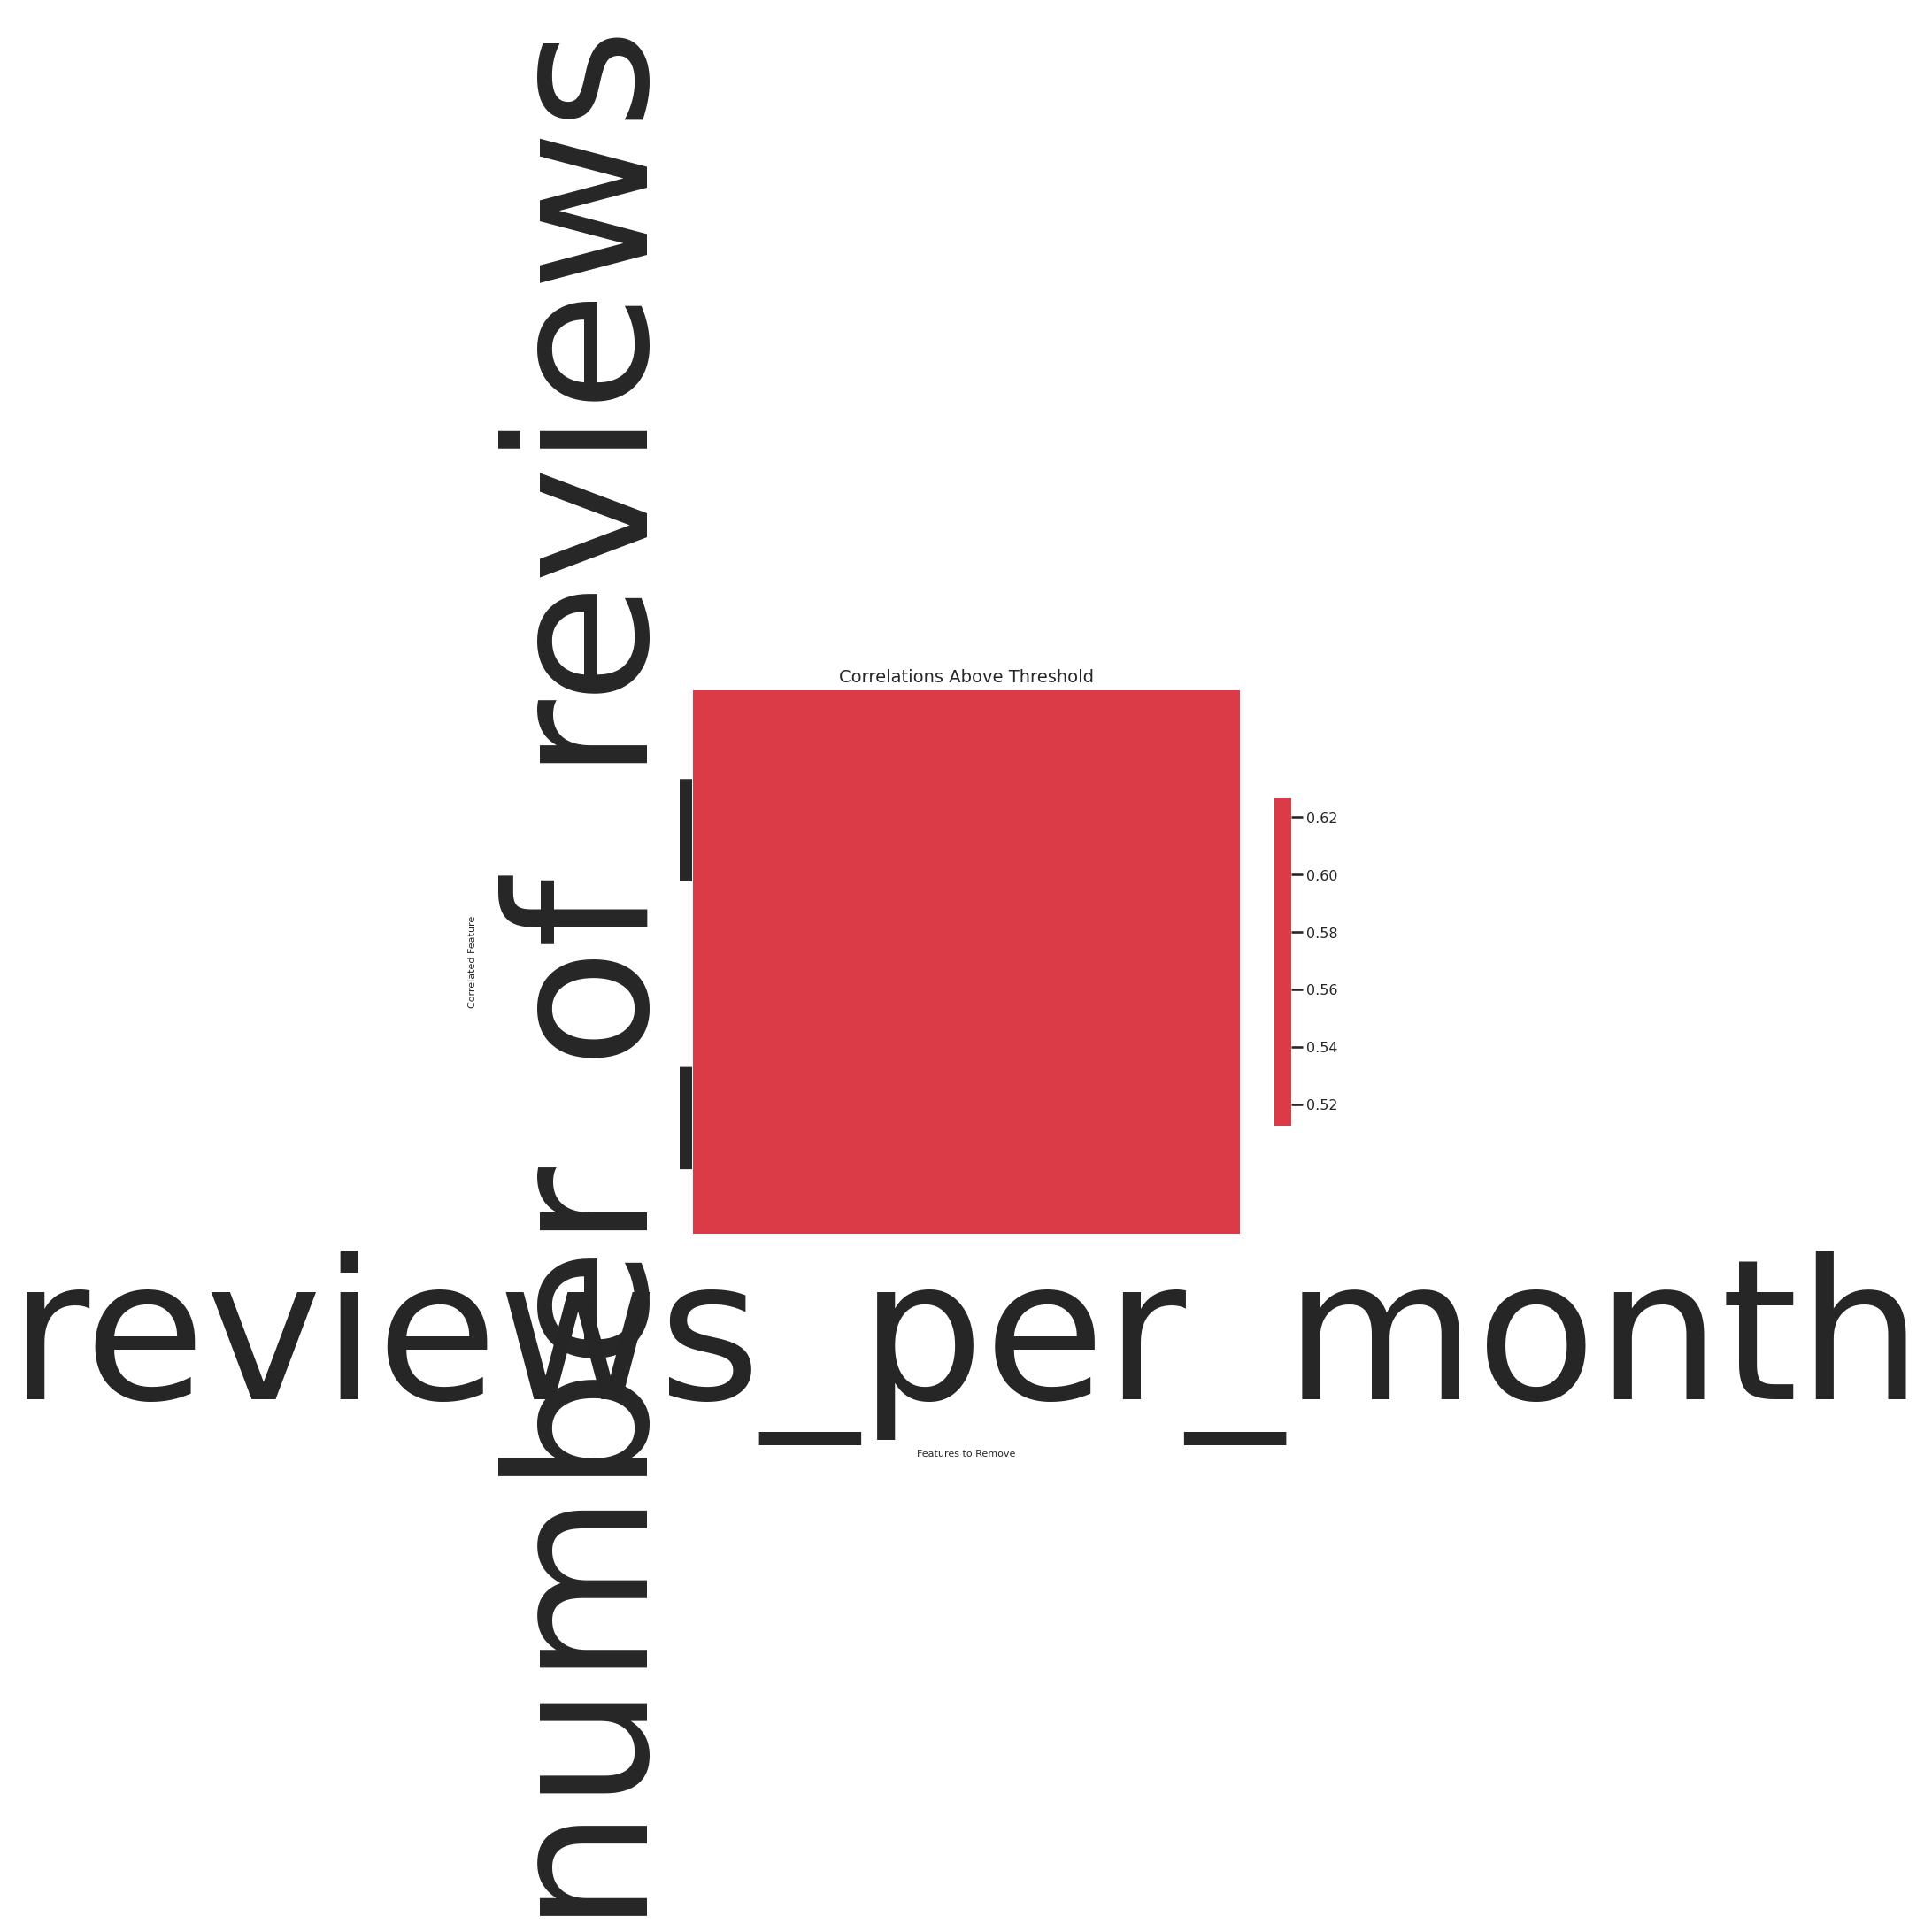

In [ ]:
fs.identify_collinear(train, 0.50)
fs.plot_collinear()

In [ ]:
fs.identify_zero_importance(train, train_labels, eval_metric='auc')

Training Gradient Boosting Model



/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecat


0 features with zero importance.



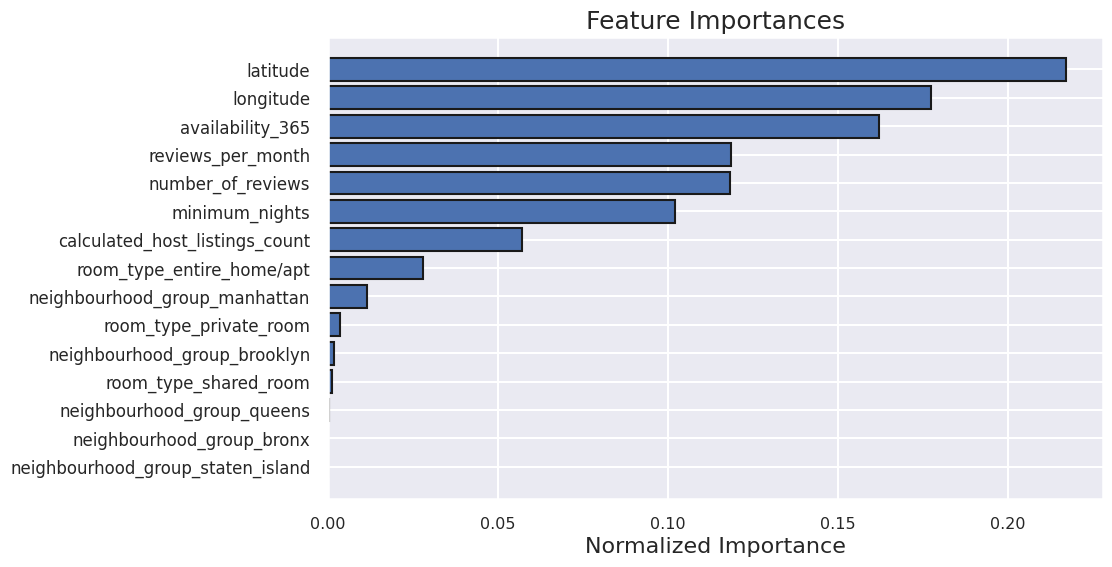

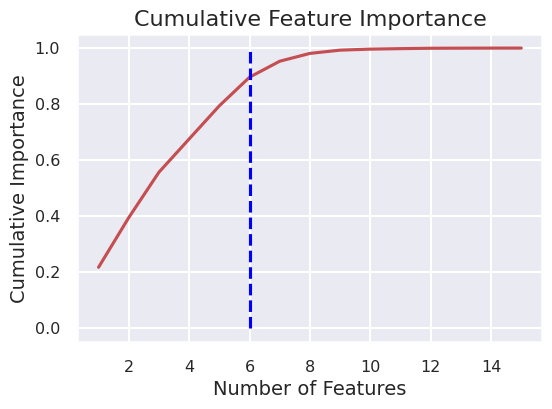

6 features required for 0.80 of cumulative importance


In [ ]:
fs.plot_feature_importances(threshold = 0.80)

In [ ]:
fs.identify_all(train, train_labels, {'missing_threshold': 0.8, 'correlation_threshold': 0.50, 'eval_metric': 'auc','task': 'classification', 'cumulative_importance': 0.99})

0 features with greater than 0.80 missing values.

0 features with a single unique value.

1 features with a correlation greater than 0.50.

Training Gradient Boosting Model



<ipython-input-31-2e7bcd4280db>:144: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
<ipython-input-31-2e7bcd4280db>:169: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'


0 features with zero importance.

7 features that do not contribute to cumulative importance of 0.99.

8 total features out of 15 identified for removal.



In [ ]:
features_identified = fs.check_identified()

8 features identified for removal


In [ ]:
list(features_identified)[:8]

['neighbourhood_group_bronx',
 'neighbourhood_group_manhattan',
 'neighbourhood_group_staten_island',
 'room_type_shared_room',
 'neighbourhood_group_brooklyn',
 'reviews_per_month',
 'room_type_private_room',
 'neighbourhood_group_queens']

In [ ]:
train_removed = fs.remove(train, methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run
Removed 8 features


In [ ]:
train_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2854 to 11158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        10000 non-null  float64
 1   longitude                       10000 non-null  float64
 2   minimum_nights                  10000 non-null  int64  
 3   number_of_reviews               10000 non-null  int64  
 4   calculated_host_listings_count  10000 non-null  int64  
 5   availability_365                10000 non-null  int64  
 6   room_type_entire_home/apt       10000 non-null  uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 556.6 KB


# Mutual information analysis

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
del df_train['above_average']
del df_val['above_average']

In [ ]:
categorical =  df.select_dtypes(exclude=numerics).columns
numerical = df.select_dtypes(include=numerics).columns

In [ ]:
df_train_full[categorical].nunique()

neighbourhood_group    5
room_type              3
dtype: int64

In [ ]:
df_train_full[numerical].describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
count,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,40.728849,-73.952330,6.950481,22.984150,1.089966,7.155179,112.143164,0.304479
std,0.054516,0.046126,20.299244,43.755137,1.601407,33.207231,131.339466,0.460192
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.690148,-73.983180,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000
50%,40.722920,-73.955750,2.000000,5.000000,0.370000,1.000000,44.000000,0.000000
75%,40.762990,-73.936387,5.000000,23.000000,1.580000,2.000000,224.000000,1.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000


In [ ]:
from IPython.display import display
global_mean = df_train_full['above_average'].mean()
global_mean

0.3044789855813478

In [ ]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).above_average.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
neighbourhood_group,,,
bronx,0.072082,-0.232397,0.236740
brooklyn,0.209833,-0.094646,0.689154
manhattan,0.454477,0.149998,1.492639
queens,0.122038,-0.182441,0.400808
staten_island,0.140523,-0.163956,0.461519


,mean,diff,risk
room_type,,,
entire_home/apt,0.528243,0.223764,1.734907
private_room,0.061212,-0.243267,0.201038
shared_room,0.060086,-0.244393,0.197340


In [ ]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.above_average)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

# room_type has bigger Mututal Information score compared to neighbouhood_group

,MI
room_type,0.144107
neighbourhood_group,0.046234


,MI
room_type,0.144107
neighbourhood_group,0.046234


In [ ]:
categorical

Index(['neighbourhood_group', 'room_type'], dtype='object')

# Scale all numeric data and encode all categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['neighbourhood_group', 'room_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df_train)

# logistic regression algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
X_val = preprocessor.fit_transform(df_val[categorical_features + numeric_features])

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred

array([[0.96803512, 0.03196488],
       [0.95018587, 0.04981413],
       [0.97949475, 0.02050525],
       ...,
       [0.7364995 , 0.2635005 ],
       [0.49368169, 0.50631831],
       [0.67520216, 0.32479784]])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03196488, 0.04981413, 0.02050525, ..., 0.2635005 , 0.50631831,
       0.32479784])

In [ ]:
above_average = y_pred > 0.5

In [ ]:
(y_val == above_average).mean()

0.8012239522813541

In [ ]:
model.intercept_[0]

-2.769036748239068

In [ ]:
dict(zip(preprocessor.transformers_[0][1].get_feature_names_out(), model.coef_[0].round(7)))

{'latitude': -0.111067,
 'longitude': -0.5830783,
 'minimum_nights': -0.197577,
 'number_of_reviews': -0.1520451,
 'reviews_per_month': -0.0440141,
 'calculated_host_listings_count': 0.0806287,
 'availability_365': 0.4328466}

In [ ]:
dict(zip(preprocessor.transformers_[1][1].get_feature_names_out(), model.coef_[0].round(7)))

{'neighbourhood_group_bronx': -0.111067,
 'neighbourhood_group_brooklyn': -0.5830783,
 'neighbourhood_group_manhattan': -0.197577,
 'neighbourhood_group_queens': -0.1520451,
 'neighbourhood_group_staten_island': -0.0440141,
 'room_type_entire_home/apt': 0.0806287,
 'room_type_private_room': 0.4328466,
 'room_type_shared_room': 0.148127}

In [ ]:
df_test

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
18907,queens,40.74596,-73.87762,private_room,2,0,0.00,2,66,0
46663,queens,40.75883,-73.92160,entire_home/apt,2,0,0.00,1,282,1
19757,brooklyn,40.69670,-73.97477,private_room,1,53,2.15,1,0,0
9705,brooklyn,40.72435,-73.95154,private_room,1,119,2.57,2,1,0
3322,manhattan,40.72754,-73.98555,entire_home/apt,3,12,0.19,2,0,1
...,...,...,...,...,...,...,...,...,...,...
6860,bronx,40.85062,-73.90251,private_room,14,5,0.13,1,322,0
42977,brooklyn,40.70450,-73.94357,entire_home/apt,6,5,2.17,1,40,0
408,brooklyn,40.65100,-73.94886,private_room,2,263,2.69,2,136,0
6778,brooklyn,40.68040,-73.93183,entire_home/apt,7,53,1.12,2,77,0


In [ ]:
X_test = df_test
y_test = df_test['above_average']
del X_test['above_average']
X_test_preprocessed = preprocessor.fit_transform(X_test)


In [ ]:
pred = model.predict(X_test_preprocessed)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(model.score(X_test_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.80


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[5921  889]
 [1100 1869]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6810
           1       0.68      0.63      0.65      2969

    accuracy                           0.80      9779
   macro avg       0.76      0.75      0.75      9779
weighted avg       0.79      0.80      0.79      9779



# Removing each feature and calculating accuracy

## Neighbourhood_group

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features_ng = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features_ng = ['room_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_ng),
        ('cat', categorical_transformer, categorical_features_ng)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
X_val = preprocessor.fit_transform(df_val[categorical_features_ng + numeric_features_ng])

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03685146, 0.04692195, 0.02553686, ..., 0.25863588, 0.60911233,
       0.34718302])

In [ ]:
above_average = y_pred > 0.5

In [ ]:
(y_val == above_average).mean()

0.7998295762646216

In [ ]:
model.intercept_[0]

-1.9734157359962743

In [ ]:
dict(zip(preprocessor.transformers_[0][1].get_feature_names_out(), model.coef_[0].round(7)))

{'latitude': 0.2885551,
 'longitude': -0.7173639,
 'minimum_nights': -0.1836757,
 'number_of_reviews': -0.1591386,
 'reviews_per_month': -0.0449087,
 'calculated_host_listings_count': 0.1330139,
 'availability_365': 0.4154705}

In [ ]:
dict(zip(preprocessor.transformers_[1][1].get_feature_names_out(), model.coef_[0].round(7)))

{'room_type_entire_home/apt': 0.2885551,
 'room_type_private_room': -0.7173639,
 'room_type_shared_room': -0.1836757}

In [ ]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
pred = model.predict(X_test_preprocessed)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(model.score(X_test_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.79


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[5788 1022]
 [1006 1963]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6810
           1       0.66      0.66      0.66      2969

    accuracy                           0.79      9779
   macro avg       0.75      0.76      0.76      9779
weighted avg       0.79      0.79      0.79      9779



## room_type

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features_rt= ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features_rt = ['neighbourhood_group']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_rt),
        ('cat', categorical_transformer, categorical_features_rt)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
X_val = preprocessor.fit_transform(df_val[categorical_features_rt + numeric_features_rt])

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.16641195, 0.31040212, 0.1153145 , ..., 0.15276116, 0.30427626,
       0.15589694])

In [ ]:
above_average = y_pred > 0.5

In [ ]:
(y_val == above_average).mean()

0.7408009915562785

In [ ]:
model.intercept_[0]

-1.7819750865581092

In [ ]:
dict(zip(preprocessor.transformers_[0][1].get_feature_names_out(), model.coef_[0].round(7)))

{'latitude': -0.1737251,
 'longitude': -0.6951049,
 'minimum_nights': -0.0506316,
 'number_of_reviews': -0.0887702,
 'reviews_per_month': -0.0509209,
 'calculated_host_listings_count': 0.1922176,
 'availability_365': 0.272396}

In [ ]:
dict(zip(preprocessor.transformers_[1][1].get_feature_names_out(), model.coef_[0].round(7)))

{'neighbourhood_group_bronx': -0.1737251,
 'neighbourhood_group_brooklyn': -0.6951049,
 'neighbourhood_group_manhattan': -0.0506316,
 'neighbourhood_group_queens': -0.0887702,
 'neighbourhood_group_staten_island': -0.0509209}

In [ ]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
pred = model.predict(X_test_preprocessed)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(model.score(X_test_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.74


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[6207  603]
 [1943 1026]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      6810
           1       0.63      0.35      0.45      2969

    accuracy                           0.74      9779
   macro avg       0.70      0.63      0.64      9779
weighted avg       0.72      0.74      0.71      9779



## number_of_reviews

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features_nor= ['latitude', 'longitude', 'minimum_nights',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_nor),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
X_val = preprocessor.fit_transform(df_val[categorical_features + numeric_features_nor])

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03238273, 0.04997113, 0.020302  , ..., 0.32267454, 0.49701983,
       0.32750549])

In [ ]:
above_average = y_pred > 0.5

In [ ]:
(y_val == above_average).mean()

0.8009915562785653

In [ ]:
model.intercept_[0]

-2.7489452136423598

In [ ]:
dict(zip(preprocessor.transformers_[0][1].get_feature_names_out(), model.coef_[0].round(7)))

{'latitude': -0.1159913,
 'longitude': -0.5802785,
 'minimum_nights': -0.1917505,
 'reviews_per_month': -0.1312732,
 'calculated_host_listings_count': 0.0912198,
 'availability_365': 0.4141531}

In [ ]:
dict(zip(preprocessor.transformers_[1][1].get_feature_names_out(), model.coef_[0].round(7)))

{'neighbourhood_group_bronx': -0.1159913,
 'neighbourhood_group_brooklyn': -0.5802785,
 'neighbourhood_group_manhattan': -0.1917505,
 'neighbourhood_group_queens': -0.1312732,
 'neighbourhood_group_staten_island': 0.0912198,
 'room_type_entire_home/apt': 0.4141531,
 'room_type_private_room': 0.1675093,
 'room_type_shared_room': 0.2648212}

In [ ]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
pred = model.predict(X_test_preprocessed)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(model.score(X_test_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.80


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[5924  886]
 [1100 1869]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6810
           1       0.68      0.63      0.65      2969

    accuracy                           0.80      9779
   macro avg       0.76      0.75      0.75      9779
weighted avg       0.79      0.80      0.79      9779



## reviews_per_month

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features_rpm= ['latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_rpm),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(df_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_preprocessed, y_train)

LogisticRegression(random_state=42)

In [ ]:
X_val = preprocessor.fit_transform(df_val[categorical_features + numeric_features_rpm])

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03139513, 0.04910295, 0.02021906, ..., 0.26606197, 0.50430517,
       0.32097531])

In [ ]:
above_average = y_pred > 0.5

In [ ]:
(y_val == above_average).mean()

0.8011464869470912

In [ ]:
model.intercept_[0]

-2.776504191431793

In [ ]:
dict(zip(preprocessor.transformers_[0][1].get_feature_names_out(), model.coef_[0].round(7)))

{'latitude': -0.1082381,
 'longitude': -0.5869951,
 'minimum_nights': -0.190191,
 'number_of_reviews': -0.174862,
 'calculated_host_listings_count': 0.0813959,
 'availability_365': 0.4284932}

In [ ]:
dict(zip(preprocessor.transformers_[1][1].get_feature_names_out(), model.coef_[0].round(7)))

{'neighbourhood_group_bronx': -0.1082381,
 'neighbourhood_group_brooklyn': -0.5869951,
 'neighbourhood_group_manhattan': -0.190191,
 'neighbourhood_group_queens': -0.174862,
 'neighbourhood_group_staten_island': 0.0813959,
 'room_type_entire_home/apt': 0.4284932,
 'room_type_private_room': 0.1415879,
 'room_type_shared_room': 0.2975719}

In [ ]:
X_test_preprocessed = preprocessor.fit_transform(X_test)
pred = model.predict(X_test_preprocessed)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(model.score(X_test_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.80


In [ ]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

[[5931  879]
 [1099 1870]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6810
           1       0.68      0.63      0.65      2969

    accuracy                           0.80      9779
   macro avg       0.76      0.75      0.76      9779
weighted avg       0.79      0.80      0.80      9779



# Algorithm harness

LR: 0.862894 (0.010115)
Score for each of the 10 K-fold tests:  [0.8729793  0.85229466 0.85444536 0.87753145 0.8577443  0.84817054
 0.87575881 0.85462539 0.8673661  0.86802812]
LogisticRegression(solver='liblinear')
	Training time: 0.076s
	Prediction time: 0.931s

LDA: 0.860994 (0.010346)
Score for each of the 10 K-fold tests:  [0.87107174 0.85107963 0.85211679 0.87632751 0.85502576 0.84565077
 0.8746539  0.85324737 0.86490046 0.86586713]
LinearDiscriminantAnalysis()
	Training time: 0.126s
	Prediction time: 1.484s

KNN: 0.852783 (0.005375)
Score for each of the 10 K-fold tests:  [0.86223417 0.8477193  0.85295978 0.84744383 0.84719386 0.8459226
 0.8575015  0.85226075 0.85590033 0.85868963]
KNeighborsClassifier()
	Training time: 0.123s
	Prediction time: 2.083s

CART: 0.733306 (0.006964)
Score for each of the 10 K-fold tests:  [0.7410526  0.72341615 0.72858351 0.71970721 0.73403582 0.73944805
 0.74110151 0.73647008 0.7326959  0.7365511 ]
DecisionTreeClassifier()
	Training time: 0.170s
	Pr

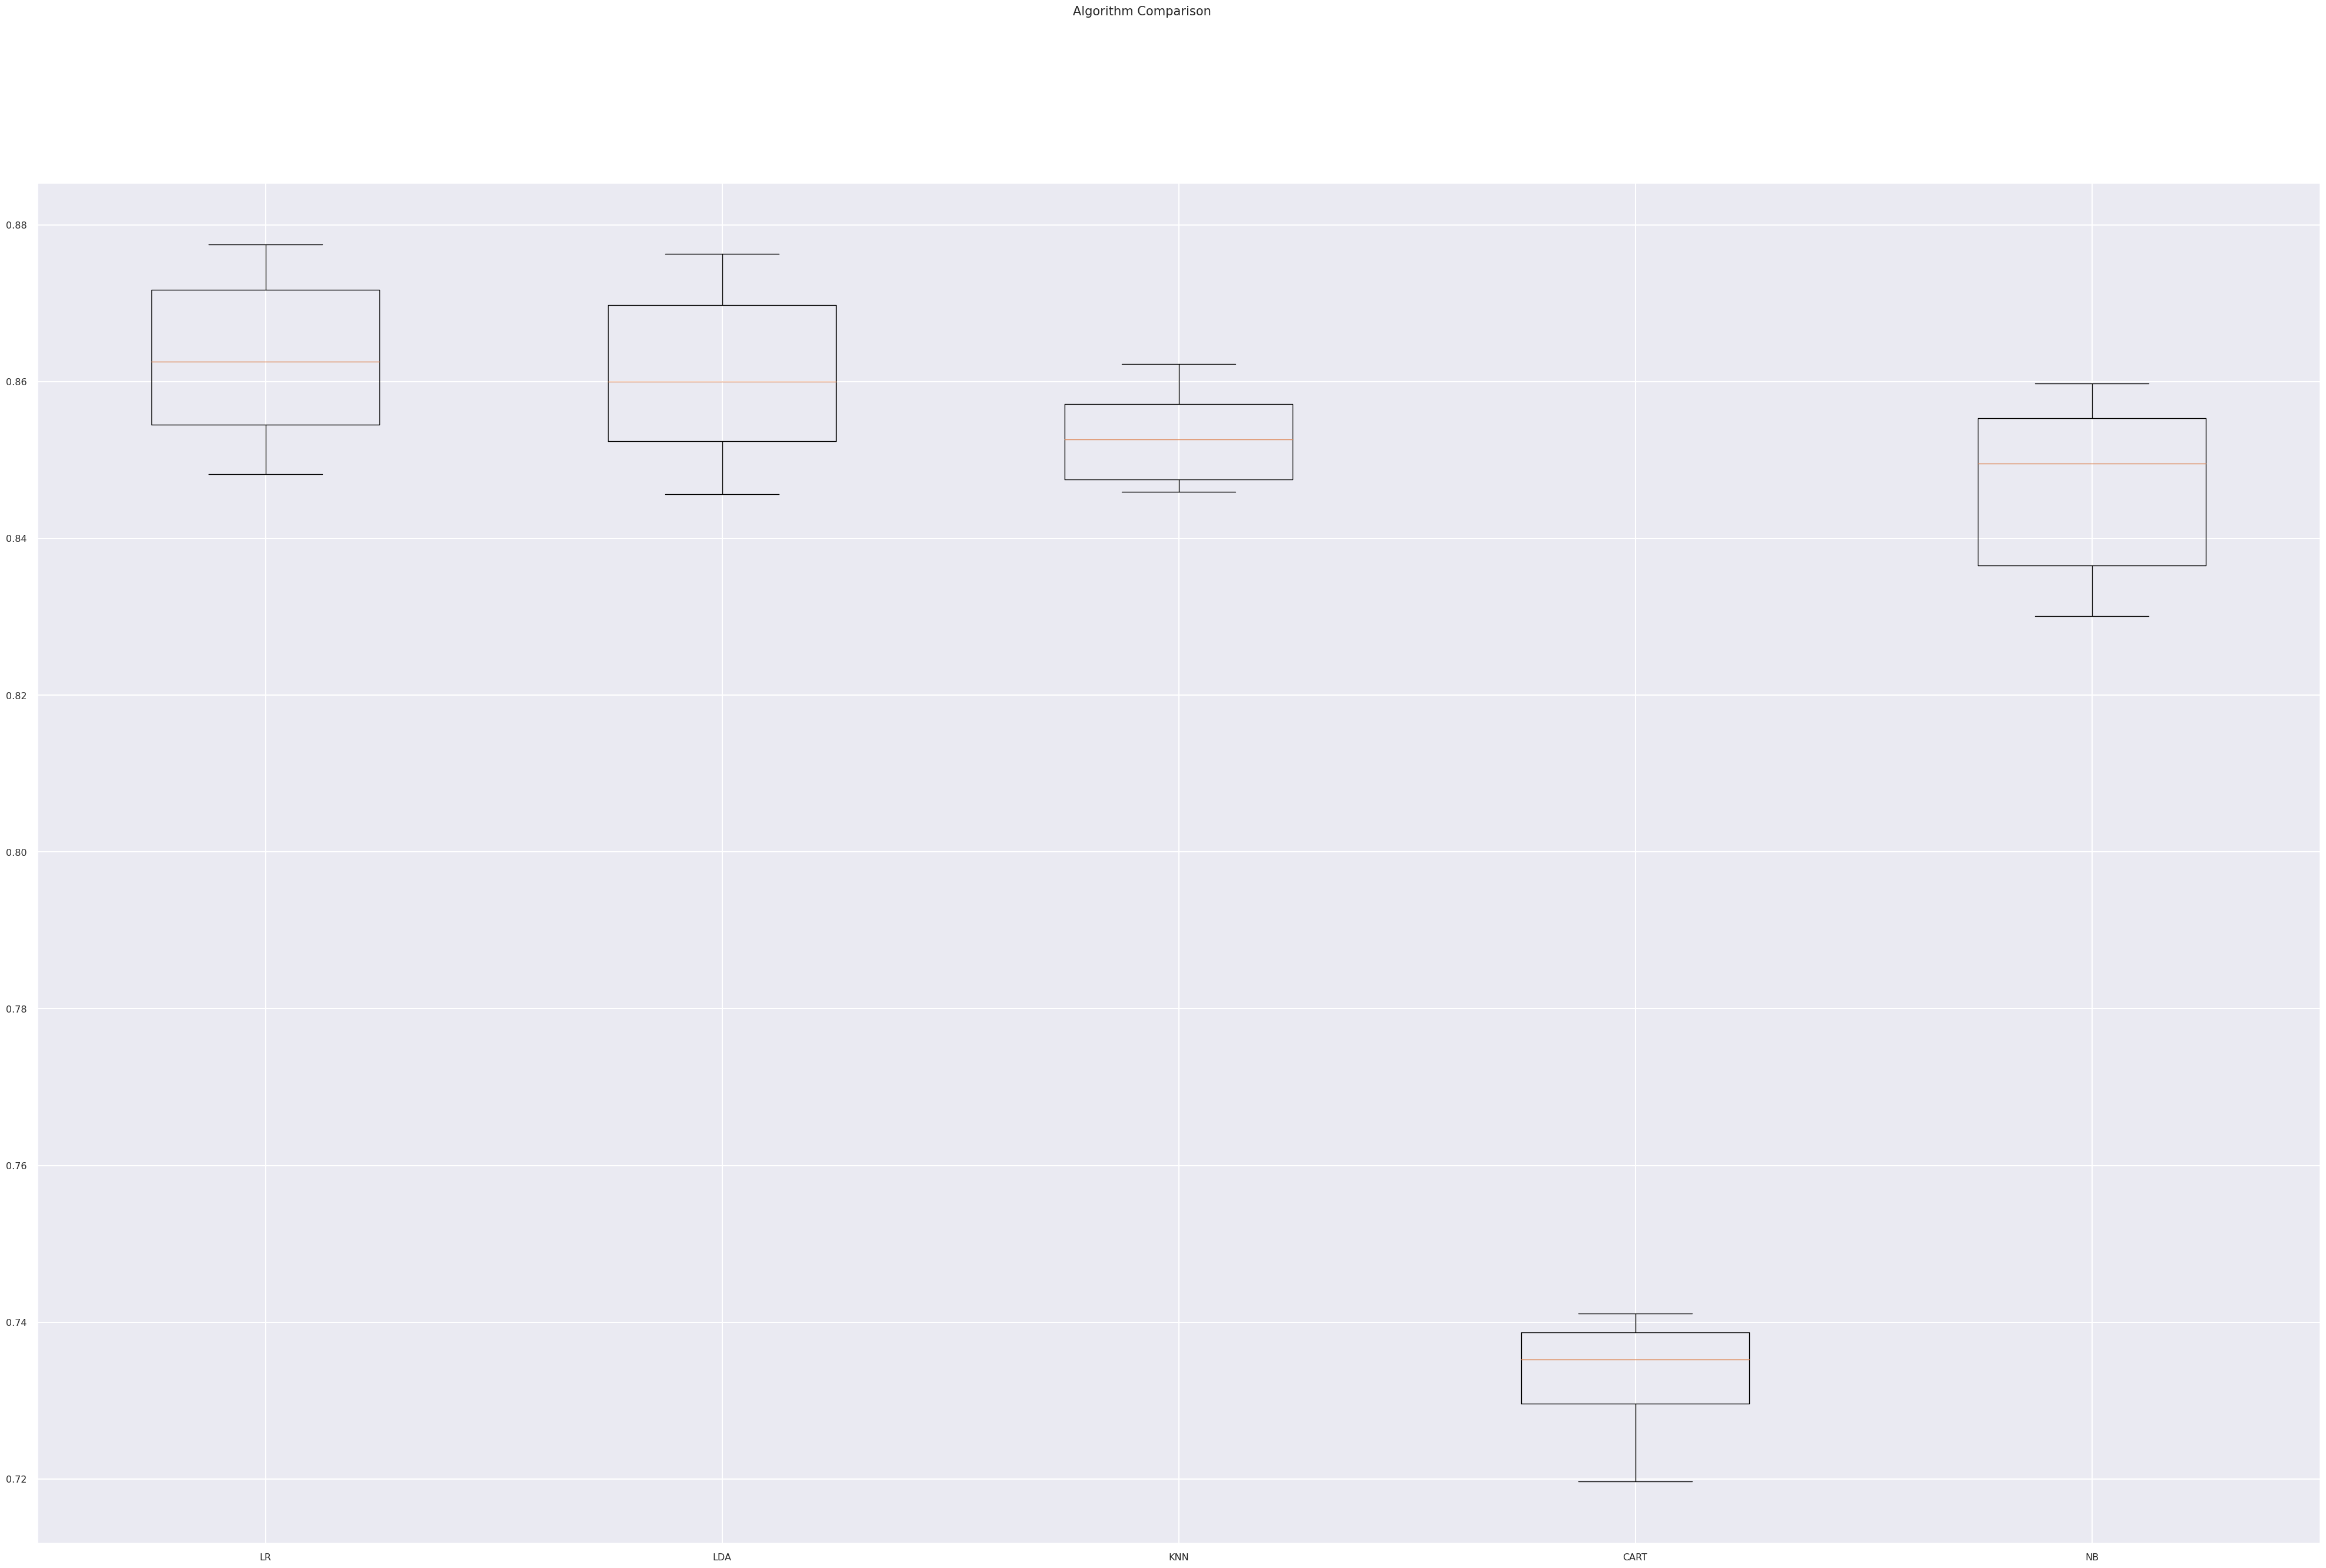

In [ ]:
# Compare Algorithms with the Algorithm Harness

# Linear Regression , LDA and KNN are top models based roc_auc
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
#scoring = 'accuracy'
# you can also use other metrics to score your models: https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_preprocessed, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_preprocessed, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Resampling

In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,brooklyn,40.64749,-73.97237,private_room,1,9,0.21,6,365,0
1,manhattan,40.75362,-73.98377,entire_home/apt,1,45,0.38,2,355,1
2,manhattan,40.80902,-73.94190,private_room,3,0,0.00,1,365,0
3,brooklyn,40.68514,-73.95976,entire_home/apt,1,270,4.64,1,194,0
4,manhattan,40.79851,-73.94399,entire_home/apt,10,9,0.10,1,0,0


In [ ]:
X = df.copy()
print(X.shape)
# Preparing the Y variable
Y = df['above_average']
print(Y.shape)
del X['above_average']
X.head()

(48895, 10)
(48895,)


,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,40.64749,-73.97237,private_room,1,9,0.21,6,365
1,manhattan,40.75362,-73.98377,entire_home/apt,1,45,0.38,2,355
2,manhattan,40.80902,-73.94190,private_room,3,0,0.00,1,365
3,brooklyn,40.68514,-73.95976,entire_home/apt,1,270,4.64,1,194
4,manhattan,40.79851,-73.94399,entire_home/apt,10,9,0.10,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
trainData = pd.concat([X_train,y_train],axis=1)

In [ ]:
trainData.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
36150,manhattan,40.83256,-73.94440,entire_home/apt,4,0,0.00,1,17,0
45223,manhattan,40.76134,-73.99299,entire_home/apt,30,0,0.00,20,332,0
14316,brooklyn,40.71119,-73.95097,private_room,1,0,0.00,1,0,1
1691,manhattan,40.75900,-73.99530,entire_home/apt,1,0,0.00,1,0,0
20195,brooklyn,40.71306,-73.94856,entire_home/apt,3,1,0.03,1,0,1


In [ ]:
# pull out all of the "yes" or minority values
ind = trainData[trainData['above_average']==1].index
print(len(ind))

10379


In [ ]:
# Separate the minority class
minData = trainData.loc[ind]
print(minData.shape)

(10379, 10)


In [ ]:
# now the majority
ind1 = trainData[trainData['above_average']==0].index
print(len(ind1))

23847


In [ ]:
# Separate the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

(23847, 10)


,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
36150,manhattan,40.83256,-73.94440,entire_home/apt,4,0,0.0,1,17,0
45223,manhattan,40.76134,-73.99299,entire_home/apt,30,0,0.0,20,332,0
1691,manhattan,40.75900,-73.99530,entire_home/apt,1,0,0.0,1,0,0
38940,brooklyn,40.68692,-73.93070,private_room,30,0,0.0,27,326,0
46364,brooklyn,40.67903,-73.94183,private_room,10,0,0.0,1,0,0


In [ ]:
majSample=majData.sample(n=len(ind),random_state=123)

In [ ]:
print(majSample.shape)
majSample.head()

(10379, 10)


,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
2420,manhattan,40.83448,-73.94476,private_room,1,33,0.48,1,189,0
29205,brooklyn,40.71233,-73.94118,private_room,1,31,1.67,1,13,0
14604,brooklyn,40.70997,-73.96470,entire_home/apt,1,1,0.02,1,0,0
34987,queens,40.75391,-73.90256,private_room,2,23,2.15,5,156,0
12912,manhattan,40.79982,-73.95375,entire_home/apt,2,18,0.42,1,0,0


In [ ]:
# Concatenating both data sets and then shuffling the data set
balData = pd.concat([minData,majSample],axis = 0)

In [ ]:
# Shuffling the data set
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
3444,manhattan,40.82078,-73.93771,private_room,4,19,0.31,8,42,0
39952,manhattan,40.79931,-73.95238,entire_home/apt,1,15,2.43,1,35,0
46967,manhattan,40.72367,-74.00229,entire_home/apt,4,0,0.00,1,5,1
5057,manhattan,40.77242,-73.96212,entire_home/apt,7,3,0.06,1,0,1
10088,manhattan,40.81270,-73.95004,private_room,1,1,0.02,1,0,0


In [ ]:
# Making the new X_train and y_train
X_trainNew = balData.iloc[:,0:9]
print(X_trainNew.head())
y_trainNew = balData['above_average']
print(y_trainNew.head())

      neighbourhood_group  latitude  longitude        room_type  \
3444            manhattan  40.82078  -73.93771     private_room   
39952           manhattan  40.79931  -73.95238  entire_home/apt   
46967           manhattan  40.72367  -74.00229  entire_home/apt   
5057            manhattan  40.77242  -73.96212  entire_home/apt   
10088           manhattan  40.81270  -73.95004     private_room   

       minimum_nights  number_of_reviews  reviews_per_month  \
3444                4                 19               0.31   
39952               1                 15               2.43   
46967               4                  0               0.00   
5057                7                  3               0.06   
10088               1                  1               0.02   

       calculated_host_listings_count  availability_365  
3444                                8                42  
39952                               1                35  
46967                               1       

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing steps
numeric_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['neighbourhood_group', 'room_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_New_preprocessed = preprocessor.fit_transform(X_trainNew)

In [ ]:
from sklearn.linear_model import LogisticRegression
newModel = LogisticRegression()
newModel.fit(X_New_preprocessed, y_trainNew)

LogisticRegression()

In [ ]:
X_New_val_preprocessed = preprocessor.fit_transform(X_test)

In [ ]:
pred = newModel.predict(X_New_val_preprocessed)
print('Accuracy of Logistic regression model prediction on test set for balanced data set: {:.2f}'.format(newModel.score(X_New_val_preprocessed, y_test)))

Accuracy of Logistic regression model prediction on test set for balanced data set: 0.76


In [ ]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred)
print(confusionMatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
#resampling using undersample  greatly improved the recall

[[7242 2927]
 [ 613 3887]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     10169
           1       0.57      0.86      0.69      4500

    accuracy                           0.76     14669
   macro avg       0.75      0.79      0.75     14669
weighted avg       0.81      0.76      0.77     14669

